# Warehouse Optimization (Model Only)

## Initilization

In [106]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas_profiling
import numpy as np
data = pd.read_csv('ML_datafile_Final.csv')
data.reset_index(drop=True, inplace=True)
OG_data = data.copy()
data = data.drop(['Item No', 'Manufacturer No', 'Product Name', 'Date', 'STOCK TYPE', 'In Stock', 'List No',
                 'UPC Code', 'Profit','Soldout/not','Qty_Remaining','Sold_day', 'Sold','Blowout','Unnamed: 0'	 ], axis=1)
data

,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3,Price(USD),Cost price,Inventory,Shipping,weight(lb),SaleRate
0,iMicro,Cartridge & Toner,Hardware & Software,Printer & Scanner,Cartridge & Toner,17.94,13.455,3,2.5,1.48,0.500000
1,Cougar,Mouse Pad,Component,Input & Output Device,Mouse Pad,20.50,15.375,3,2.5,1.00,0.500000
2,ASUS,Wireless Router,Component,Networking,Wireless Networking,25.62,19.215,3,2.5,1.02,0.500000
3,Dynatron,Server,Component,Fan & Heatsink,CPU Fan & Heatsink,32.80,24.600,3,2.5,0.99,0.500000
4,Linksys,Wireless Router,Component,Networking,Wireless Networking,41.00,30.750,3,2.5,1.40,0.500000
...,...,...,...,...,...,...,...,...,...,...,...
4195,SUPER TALENT,Server DDR3,Component,DRAM Memory,Server DRAM,76.88,57.660,1,0.0,0.08,0.011111
4196,QNAP,Server,Component,Power Supply,Server,142.00,106.500,1,2.5,3.00,0.011111
4197,Supermicro,1U,Component,Server,Server Barebone,105.00,78.750,1,0.0,0.00,0.011111
4198,Supermicro,Accessory,Hardware & Software,Server & Workstation,Accessory,119.92,89.940,1,2.5,2.00,0.011111


In [107]:
# limit to categorical data
nominal_data = data.select_dtypes(include=[object])
ordinal_data = data.drop(list(nominal_data.columns), axis=1)
nominal_data = nominal_data.replace(np.nan, 'Default', regex=True)

## One-Hot Encoding

In [108]:
from sklearn import preprocessing
nominal_data_2 = nominal_data
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()
# 2. FIT
enc.fit(nominal_data_2)
# 3. Transform
onehotlabels = enc.transform(nominal_data_2).toarray()
print(onehotlabels.shape)

(4200, 458)


In [109]:
encoded_data = pd.concat([ordinal_data, pd.DataFrame(onehotlabels)], axis=1)

In [110]:
encoded_data_OG = pd.concat([encoded_data, OG_data['Soldout/not']], axis=1)

In [112]:
encoded_data_OG = encoded_data_OG[encoded_data_OG['Soldout/not']== 'NotSold']

In [113]:
encoded_data_OG.shape

(430, 465)

In [114]:
encoded_data.columns

Index(['Price(USD)', 'Cost price',  'Inventory',   'Shipping', 'weight(lb)',
         'SaleRate',            0,            1,            2,            3,
       ...
                448,          449,          450,          451,          452,
                453,          454,          455,          456,          457],
      dtype='object', length=464)

In [115]:
encoded_data_OG.columns

Index([ 'Price(USD)',  'Cost price',   'Inventory',    'Shipping',
        'weight(lb)',    'SaleRate',             0,             1,
                   2,             3,
       ...
                 449,           450,           451,           452,
                 453,           454,           455,           456,
                 457, 'Soldout/not'],
      dtype='object', length=465)

In [116]:
encoded_data.head(30)

,Price(USD),Cost price,Inventory,Shipping,weight(lb),SaleRate,0,1,2,3,...,448,449,450,451,452,453,454,455,456,457
0,17.94,13.4550,3,2.5,1.48,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.50,15.3750,3,2.5,1.00,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.62,19.2150,3,2.5,1.02,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,32.80,24.6000,3,2.5,0.99,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41.00,30.7500,3,2.5,1.40,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,60.47,45.3525,2,2.5,0.21,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,217.30,162.9750,2,2.5,0.50,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8.10,3.1000,1,0.0,0.42,0.166667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,30.75,23.0625,1,2.5,1.28,0.166667,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.10,3.0750,1,0.0,0.13,0.125000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
print(encoded_data.shape)

(4200, 464)


In [118]:
#Library Import
import random
import pandas as pd
import numpy as np
import pickle
from math import sqrt
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import validation_curve

## Data Split

In [119]:
X = encoded_data.drop('SaleRate', axis=1)
Y = encoded_data['SaleRate']

In [132]:
X_NotSold = encoded_data_OG.drop(['SaleRate','Soldout/not'], axis=1)
Y_NotSold  = encoded_data_OG['SaleRate']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state = 1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size= 0.5, random_state = 1)
X_train.head(5)

,Price(USD),Cost price,Inventory,Shipping,weight(lb),0,1,2,3,4,...,448,449,450,451,452,453,454,455,456,457
2490,3276.92,2457.6900,6,10.0,172.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3291,194.75,146.0625,1,2.5,0.55,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1690,184.50,138.3750,9,2.5,5.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1672,18.45,13.8375,7,2.5,0.37,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
255,203.98,152.9850,12,10.0,36.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Training with validation 

In [126]:
from matplotlib import pyplot as plt
%matplotlib inline

def train(models, X, Y, iterations = 5, X_train = X_train,  y_train = y_train, X_val = X_val, y_val = y_val):
    results = {}
    for i in models:
        print("\nRunning ", i)
        r2_train = []
        r2_val = []
        mae_train = []
        mae_val = []
        mse_train = []
        mse_val = []
        mabe_train = []
        mabe_val = []
        mevs_train = []
        mevs_val = []
        for j in range(1, iterations):
            print(j, end='')
            h = int(4200/iterations*j)
            r2_val.append(metrics.r2_score(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            r2_train.append(metrics.r2_score(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            mae_val.append(metrics.mean_absolute_error(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            mae_train.append(metrics.mean_absolute_error(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            mse_val.append(metrics.mean_squared_error(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            mse_train.append(metrics.mean_squared_error(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            mabe_val.append(metrics.median_absolute_error(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            mabe_train.append(metrics.median_absolute_error(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            mevs_val.append(metrics.explained_variance_score(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            mevs_train.append(metrics.explained_variance_score(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                    y_train.head(h)).predict(X_train)))
            
#R2 score
        fig, ax = plt.subplots()       
        plt.xlabel('Iterations') 
        plt.ylabel('Score') 
        ax.plot(r2_train, label='train')
        ax.plot(r2_val, label='test')
        plt.title("r2_val-train_score " + i)
        ax.legend()
        plt.figure()
#mae
        fig, ax = plt.subplots() 
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        ax.plot(mae_train, label='train')
        ax.plot(mae_val, label='test')
        plt.title("mean_absolute_error_train-val " + i)
        ax.legend()
        plt.figure()
#mse
        fig, ax = plt.subplots() 
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        ax.plot(mse_train, label='train')
        ax.plot(mse_val, label='val')
        plt.title("mean_squared_error_train-val " + i)
        ax.legend()
        plt.figure()
#mabe        
        fig, ax = plt.subplots() 
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        ax.plot(mabe_train, label='train')
        ax.plot(mabe_val, label='val')
        plt.title("median_absolute_error_train-val " + i)
        ax.legend()
        plt.figure()
#mevs
        fig, ax = plt.subplots()
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        ax.plot(mevs_train, label='train')
        ax.plot(mevs_val, label='val')
        plt.title("explained_variance_score_train-val " + i)
        ax.legend()
        plt.figure()
        
        results[i] = [r2_val[-1],r2_train[-1],mae_val[-1],mae_train[-1],mse_val[-1],mse_train[-1],mabe_val[-1],mabe_train[-1],
                      mevs_val[-1],mevs_train[-1]]
    return pd.DataFrame(results), models

In [127]:
models = {'ElasticNet': linear_model.ElasticNet(),
          'Lasso': linear_model.Lasso(),
          'Ridge': linear_model.Ridge(),
          'GBM': GradientBoostingRegressor(),
          'ada': AdaBoostRegressor(),
          'RFR':RandomForestRegressor()}


Running  ElasticNet
1
Running  Lasso
1
Running  Ridge
1
Running  GBM
1
Running  ada
1
Running  RFR
1Wall time: 49.5 s


,ElasticNet,Lasso,Ridge,GBM,ada,RFR
0,0.538008,0.533834,0.558868,0.836895,0.806562,0.814210
1,0.646687,0.645596,0.688184,0.891353,0.837862,0.921766
2,0.518782,0.522546,0.489214,0.254255,0.278812,0.266955
3,0.506881,0.508607,0.453545,0.231092,0.265058,0.158022
4,0.507565,0.512150,0.484647,0.179291,0.228726,0.210387
5,0.465347,0.466783,0.410691,0.143233,0.216517,0.105007
6,0.410594,0.418130,0.365968,0.110862,0.100228,0.107419
7,0.418262,0.419746,0.348897,0.112039,0.135476,0.050857
8,0.544916,0.540682,0.564074,0.838239,0.809091,0.807948
9,0.646727,0.645637,0.688184,0.890899,0.841174,0.921046


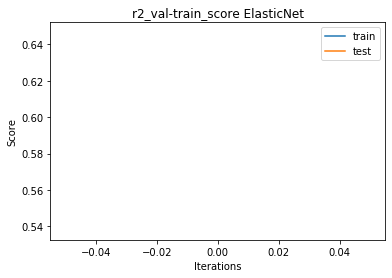

<Figure size 432x288 with 0 Axes>

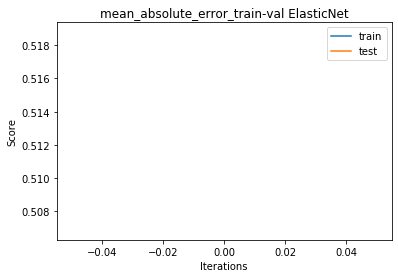

<Figure size 432x288 with 0 Axes>

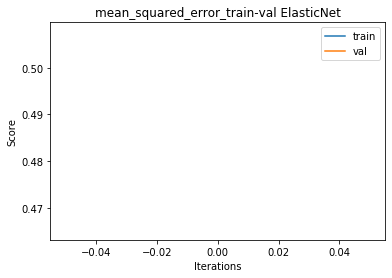

<Figure size 432x288 with 0 Axes>

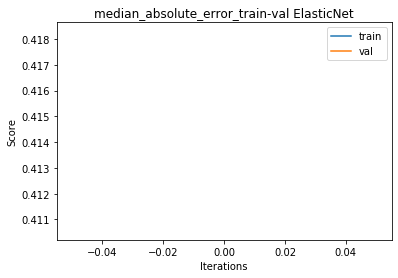

<Figure size 432x288 with 0 Axes>

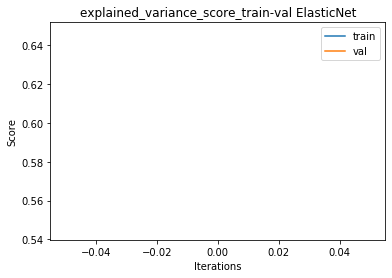

<Figure size 432x288 with 0 Axes>

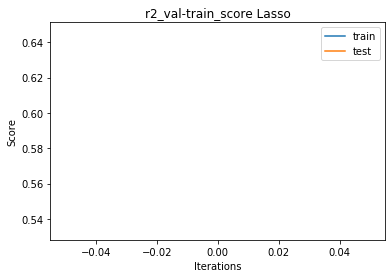

<Figure size 432x288 with 0 Axes>

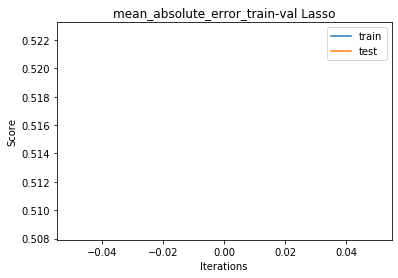

<Figure size 432x288 with 0 Axes>

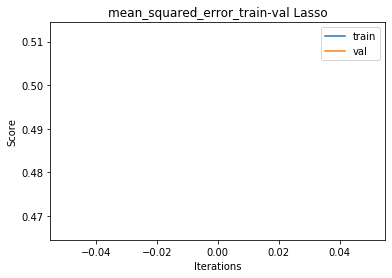

<Figure size 432x288 with 0 Axes>

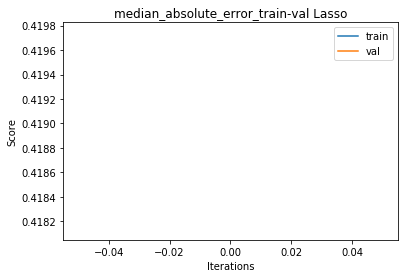

<Figure size 432x288 with 0 Axes>

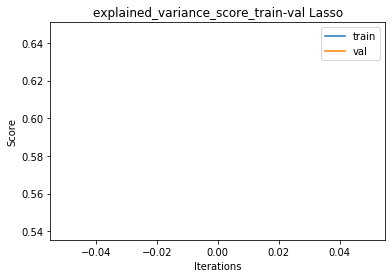

<Figure size 432x288 with 0 Axes>

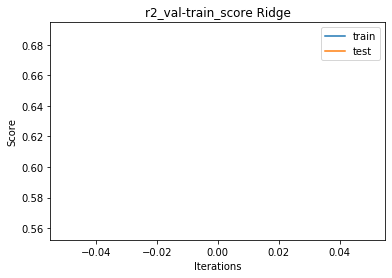

<Figure size 432x288 with 0 Axes>

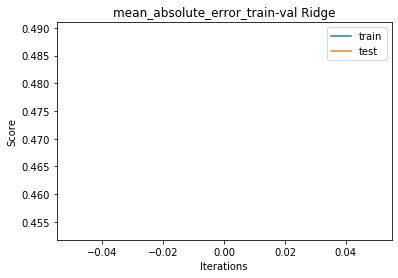

<Figure size 432x288 with 0 Axes>

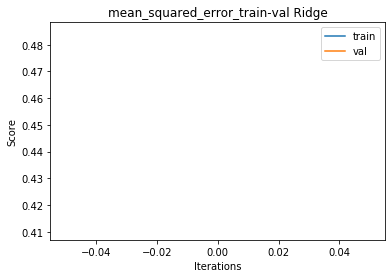

<Figure size 432x288 with 0 Axes>

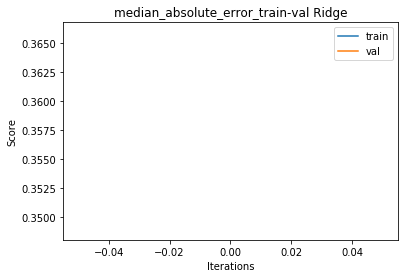

<Figure size 432x288 with 0 Axes>

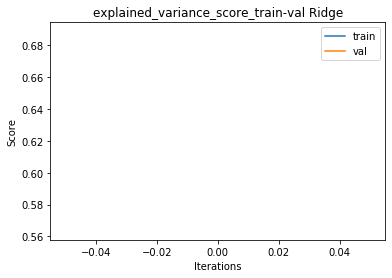

<Figure size 432x288 with 0 Axes>

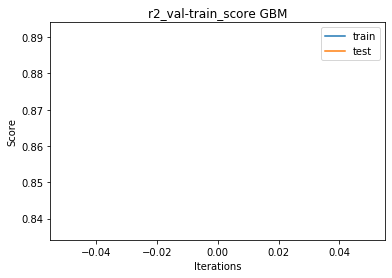

<Figure size 432x288 with 0 Axes>

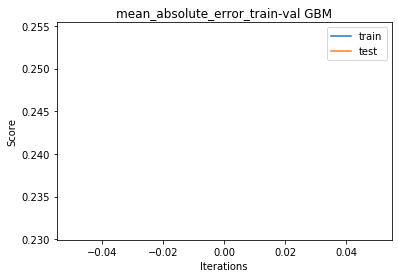

<Figure size 432x288 with 0 Axes>

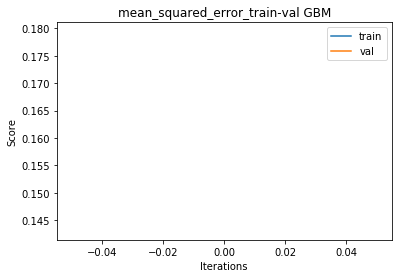

<Figure size 432x288 with 0 Axes>

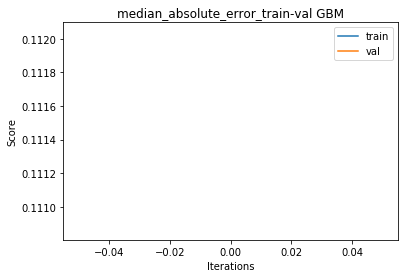

<Figure size 432x288 with 0 Axes>

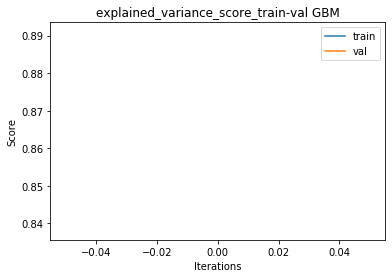

<Figure size 432x288 with 0 Axes>

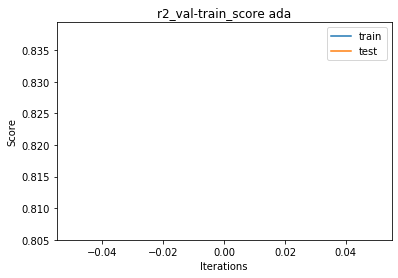

<Figure size 432x288 with 0 Axes>

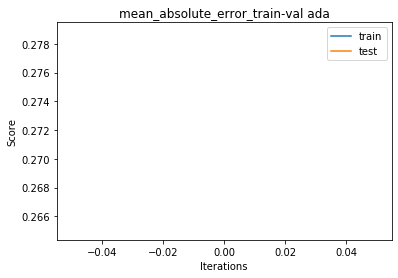

<Figure size 432x288 with 0 Axes>

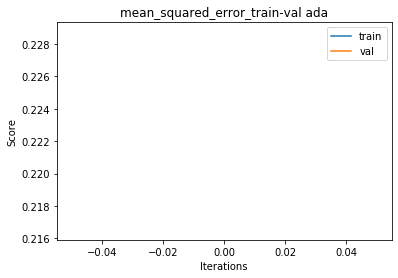

<Figure size 432x288 with 0 Axes>

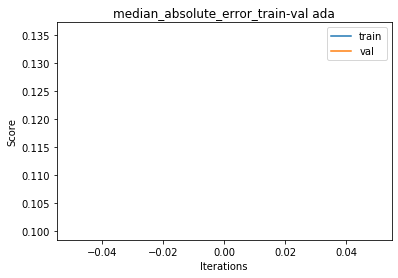

<Figure size 432x288 with 0 Axes>

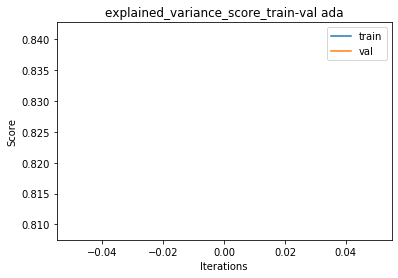

<Figure size 432x288 with 0 Axes>

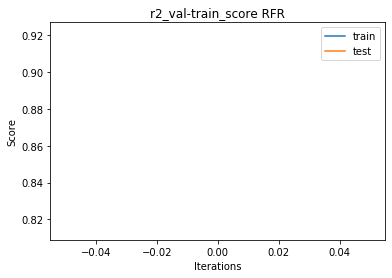

<Figure size 432x288 with 0 Axes>

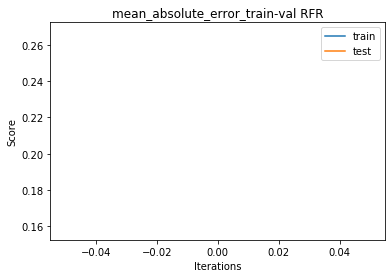

<Figure size 432x288 with 0 Axes>

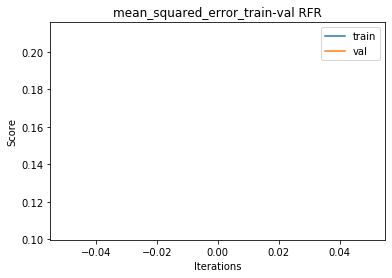

<Figure size 432x288 with 0 Axes>

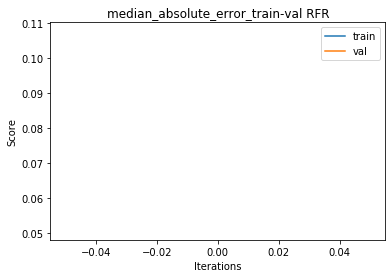

<Figure size 432x288 with 0 Axes>

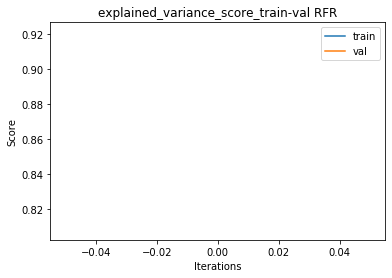

<Figure size 432x288 with 0 Axes>

In [128]:
%time result, models = train(models, X, Y, iterations=2)
result

In [69]:
y_test.head(10)

2424    0.137255
2779    0.016129
2011    1.454545
986     0.031250
3298    0.011905
3707    0.766667
2967    0.753623
1453    1.243902
3849    0.333333
2871    3.909091
Name: SaleRate, dtype: float64

#### Save and Load Machine Learning Models

In [71]:
from joblib import dump, load
for model in models.keys():
    dump(models[model], model + '.joblib')

#### Tunning

In [27]:
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

ada_param = {
 'n_estimators': [50],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

gbm_param = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'max_depth':[1,3,5,7,9],
 'loss' : ['ls', 'lad', 'huber', 'quantile']
 }

RFR_param = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


models2 = {'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(X, Y).best_estimator_,
           'Ada': GridSearchCV(AdaBoostRegressor(), 
                               param_grid=ada_param).fit(X, Y).best_estimator_,
           'GBM': GridSearchCV(GradientBoostingRegressor(), 
                               param_grid=gbm_param).fit(X, Y).best_estimator_,
           'RFR': GridSearchCV(RandomForestRegressor(), 
                              param_grid=RFR_param).fit(X, Y).best_estimator_}


Running  Ridge
1234
Running  Ada
1234
Running  GBM
1234
Running  RFR
1234Wall time: 4min 20s


(      Ridge       Ada       GBM       RFR
 0  0.644343  0.719512  0.673872  0.208781
 1  0.692095  0.771966  0.760973  0.237176
 2  0.482903  0.404804  0.372075  0.676864
 3  0.460479  0.471528  0.360717  0.672271
 4  0.492198  0.269702  0.440410  1.085804
 5  0.412949  0.266637  0.320217  1.031927
 6  0.374566  0.323540  0.156462  0.607253
 7  0.378324  0.387334  0.164207  0.575017
 8  0.646950  0.781901  0.765840  0.216611
 9  0.692095  0.819869  0.840293  0.260818,
 {'Ridge': Ridge(alpha=200, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='auto', tol=0.001),
  'Ada': AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='exponential',
                    n_estimators=50, random_state=None),
  'GBM': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='quantile', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
         

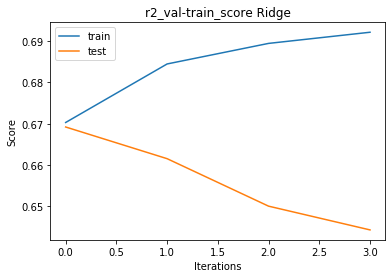

<Figure size 432x288 with 0 Axes>

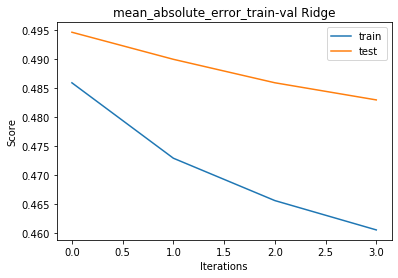

<Figure size 432x288 with 0 Axes>

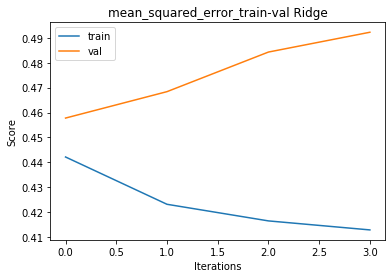

<Figure size 432x288 with 0 Axes>

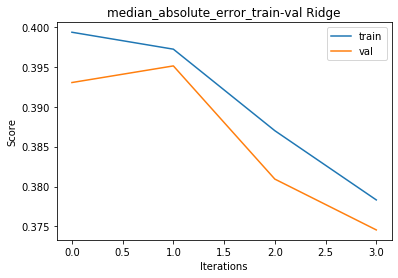

<Figure size 432x288 with 0 Axes>

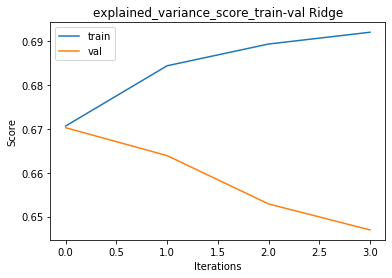

<Figure size 432x288 with 0 Axes>

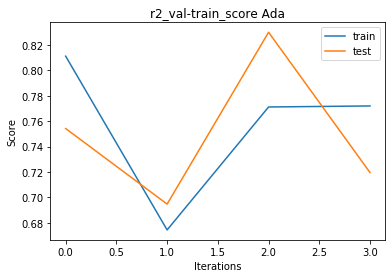

<Figure size 432x288 with 0 Axes>

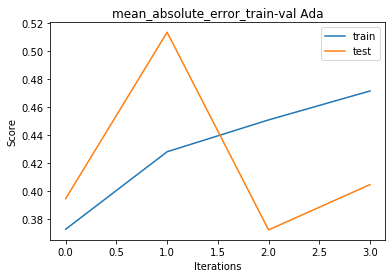

<Figure size 432x288 with 0 Axes>

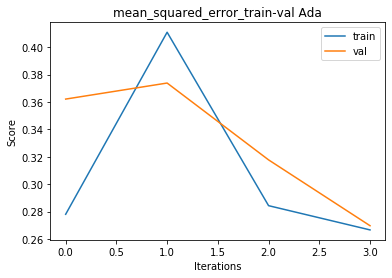

<Figure size 432x288 with 0 Axes>

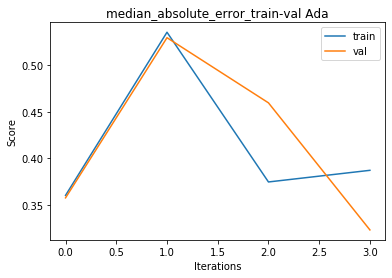

<Figure size 432x288 with 0 Axes>

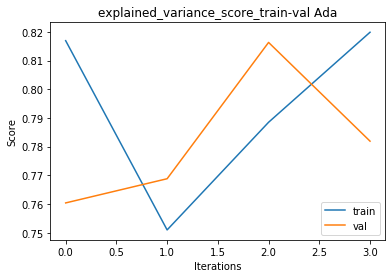

<Figure size 432x288 with 0 Axes>

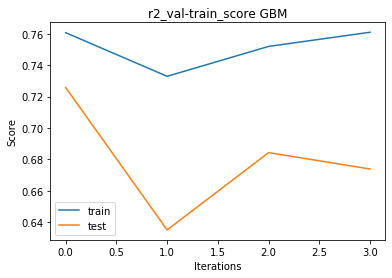

<Figure size 432x288 with 0 Axes>

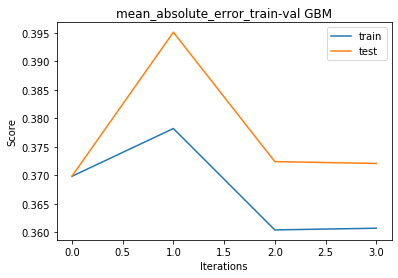

<Figure size 432x288 with 0 Axes>

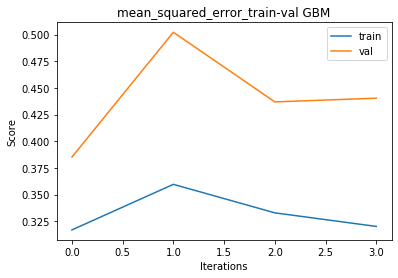

<Figure size 432x288 with 0 Axes>

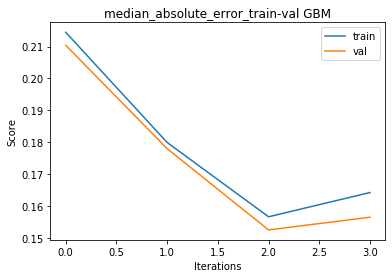

<Figure size 432x288 with 0 Axes>

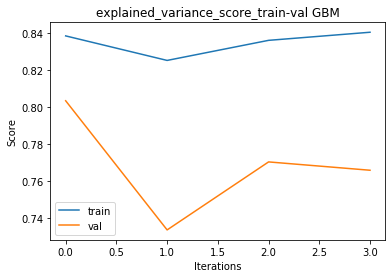

<Figure size 432x288 with 0 Axes>

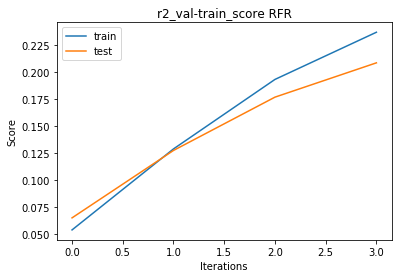

<Figure size 432x288 with 0 Axes>

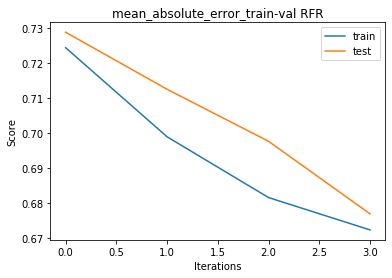

<Figure size 432x288 with 0 Axes>

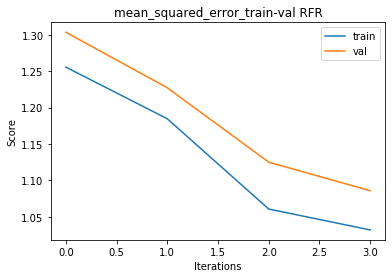

<Figure size 432x288 with 0 Axes>

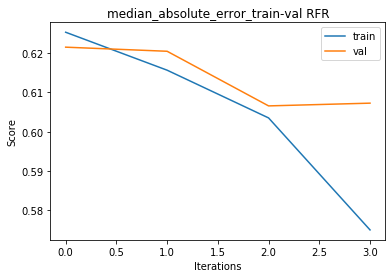

<Figure size 432x288 with 0 Axes>

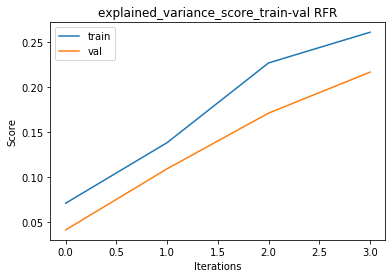

<Figure size 432x288 with 0 Axes>

In [28]:
%time train(models2, X, Y)

#### Model prediction with Testing (Unsold data)

In [136]:
#model prediction with testing
from matplotlib import pyplot as plt
%matplotlib inline

def test2(models, X, Y, iterations = 2, X_train = X_train,  y_train = y_train, X_test = X_test, y_test = y_test):
    results = {}
    for i in models:
        print("\nRunning ", i)
        table = dict()
        for j in range(1, iterations):
            print(j, end='')
            table['r2_test'] = metrics.r2_score(y_test, models[i].predict(X_test))
            table['r2_train'] = metrics.r2_score(y_train, models[i].predict(X_train))
            table['mae_test'] = metrics.mean_absolute_error(y_test, models[i].predict(X_test))
            table['mae_train'] = metrics.mean_absolute_error(y_train, models[i].predict(X_train))
            table['mse_test'] = metrics.mean_squared_error(y_test, models[i].predict(X_test))
            table['mse_train'] = metrics.mean_squared_error(y_train, models[i].predict(X_train))
            table['mabe_test'] = metrics.median_absolute_error(y_test, models[i].predict(X_test))
            table['mabe_train'] = metrics.median_absolute_error(y_train, models[i].predict(X_train))
            table['mevs_test'] = metrics.explained_variance_score(y_test, models[i].predict(X_test))
            table['mevs_train'] = metrics.explained_variance_score(y_train, models[i].predict(X_train))
            table['rmse_train'] = sqrt(table['mse_train'])
            table['rmse_test'] = sqrt(table['mse_test'])
            
            #R2 score
        fig, ax = plt.subplots()       
        plt.xlabel('Iterations') 
        plt.ylabel('Score') 
        ax.plot(table['r2_test'], label='train')
        ax.plot(['r2_train'], label='test')
        plt.title("r2_val-train_score " + i)
        ax.legend()
        plt.figure()
             
        results[i] = table
    return pd.DataFrame(results), models

In [99]:
from joblib import dump, load
models = {'ElasticNet': load('ElasticNet.joblib'),
          'Lasso': load('Lasso.joblib'), 
          'Ridge': load('Ridge.joblib'),
          'ada'  : load('ada.joblib'),
          'GBM'  : load('GBM.joblib'),
          'RFR'  : load('RFR.joblib')}


Running  ElasticNet
1
Running  Lasso
1
Running  Ridge
1
Running  ada
1
Running  GBM
1
Running  RFR
1Wall time: 2.3 s


,ElasticNet,Lasso,Ridge,ada,GBM,RFR
r2_test,0.723462,0.722610,0.741709,0.867871,0.881332,0.848274
r2_train,0.646361,0.645595,0.704712,0.857478,0.898854,0.973414
mae_test,0.523689,0.525468,0.483828,0.284485,0.261527,0.277263
mae_train,0.508791,0.510174,0.445376,0.259467,0.221312,0.098476
mse_test,0.494429,0.495952,0.461804,0.236236,0.212170,0.271275
mse_train,0.465776,0.466786,0.388922,0.187715,0.133219,0.035016
mabe_test,0.419838,0.422933,0.352499,0.130452,0.134636,0.107661
mabe_train,0.423384,0.424579,0.346939,0.124284,0.104132,0.035165
mevs_test,0.723558,0.722710,0.741724,0.868425,0.881372,0.848769
mevs_train,0.646361,0.645595,0.704712,0.857807,0.898854,0.973414


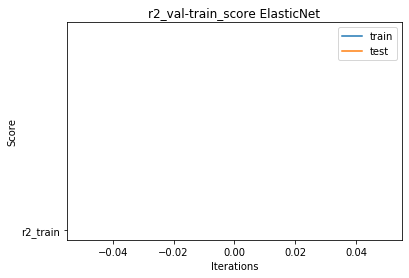

<Figure size 432x288 with 0 Axes>

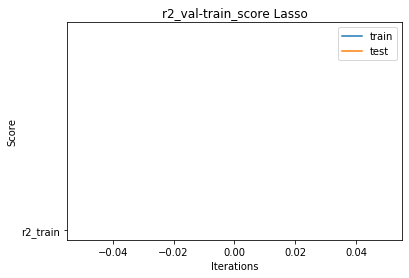

<Figure size 432x288 with 0 Axes>

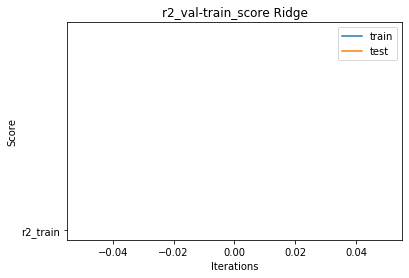

<Figure size 432x288 with 0 Axes>

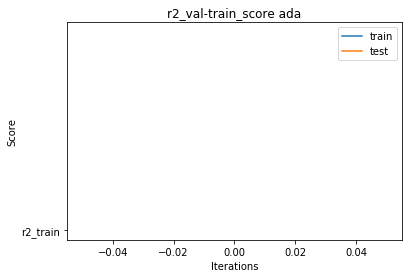

<Figure size 432x288 with 0 Axes>

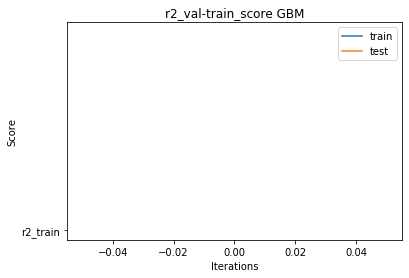

<Figure size 432x288 with 0 Axes>

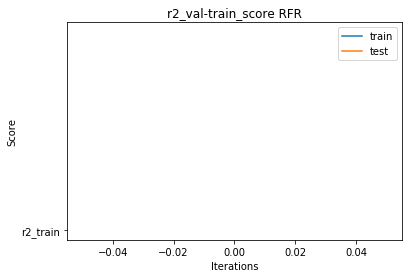

<Figure size 432x288 with 0 Axes>

In [78]:
%time result, models = test2(models, X, Y)
result


Running  GBM
1Wall time: 376 ms


,GBM
mabe_test,0.620798
mabe_train,0.104132
mae_test,0.665451
mae_train,0.221312
mevs_test,0.900772
mevs_train,0.898854
mse_test,0.680223
mse_train,0.133219
r2_test,0.768458
r2_train,0.898854


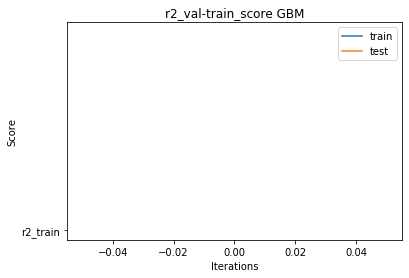

<Figure size 432x288 with 0 Axes>

In [142]:
from joblib import dump, load
models_Not_Sold = {'GBM'  : load('GBM.joblib')} 
%time result, models_Not_Sold = test2(models_Not_Sold, X, Y, X_test = X_NotSold, y_test = Y_NotSold)
result

In [79]:
for i in result:
    print(dict(result[i]))

{'r2_test': 0.723461529821595, 'r2_train': 0.6463609563046717, 'mae_test': 0.5236887512426843, 'mae_train': 0.5087913776356436, 'mse_test': 0.4944293385006347, 'mse_train': 0.4657764968475938, 'mabe_test': 0.4198378693646254, 'mabe_train': 0.4233844111397533, 'mevs_test': 0.7235577443333974, 'mevs_train': 0.6463609563046717}
{'r2_test': 0.7226098181465839, 'r2_train': 0.6455947638134061, 'mae_test': 0.5254676330589669, 'mae_train': 0.5101739592262166, 'mse_test': 0.4959521329234044, 'mse_train': 0.46678564575480574, 'mabe_test': 0.42293271820910994, 'mabe_train': 0.42457889720282616, 'mevs_test': 0.722709599978254, 'mevs_train': 0.6455947638134062}
{'r2_test': 0.741709237031766, 'r2_train': 0.7047124531616333, 'mae_test': 0.48382838088768243, 'mae_train': 0.4453756665377708, 'mse_test': 0.46180385315945366, 'mse_train': 0.38892198579630743, 'mabe_test': 0.3524987520222028, 'mabe_train': 0.3469389011119479, 'mevs_test': 0.7417239564289922, 'mevs_train': 0.7047124531616333}
{'r2_test': 0

#### Number of days prediction (i.e Blowout period)

In [140]:
y_pred_NotSold = models['GBM'].predict(X_NotSold)
print(y_pred_NotSold[:10])
print(y_test.head(10))

[0.03469671 0.03866862 0.05774326 0.05774326 0.03646383 0.05377136
 0.05774326 0.98975945 1.01434853 1.05489608]
2424    0.137255
2779    0.016129
2011    1.454545
986     0.031250
3298    0.011905
3707    0.766667
2967    0.753623
1453    1.243902
3849    0.333333
2871    3.909091
Name: SaleRate, dtype: float64


In [141]:
y_test

2424    0.137255
2779    0.016129
2011    1.454545
986     0.031250
3298    0.011905
          ...   
416     0.200000
1823    1.159091
1167    1.457143
2458    1.000000
2425    0.137255
Name: SaleRate, Length: 420, dtype: float64

In [87]:
#blowout period identification using best performing algorithm
X_test['y_pred'] = y_pred_NotSold
X_test['blowout_pred'] = pd.DataFrame({"Days" : X_test.Inventory -  / X_test['y_pred']})
X_test['blowout'] = pd.DataFrame({"Days" : X_test.Inventory / y_test})
X_test.head(10)

,Price(USD),Cost price,Inventory,Shipping,weight(lb),0,1,2,3,4,...,451,452,453,454,455,456,457,y_pred,blowout_pred,blowout
2424,3.95,2.9625,7,0.0,0.19,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151254,46.279859,51.000000
2779,75.00,56.2500,1,10.0,35.19,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.015426,-64.825563,62.000000
2011,30.75,23.0625,64,0.0,0.10,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.788690,81.147241,44.000000
986,169.12,126.8400,1,10.0,40.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010721,93.278813,32.000000
3298,1288.43,966.3225,1,3.5,15.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046149,21.669108,84.000000
3707,43.56,32.6700,86,2.5,6.61,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.912662,94.229877,112.173913
2967,127.10,95.3250,52,3.5,24.73,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.926918,56.099867,69.000000
1453,21.53,16.1475,51,2.5,0.99,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.930613,54.802563,41.000000
3849,106.60,79.9500,46,10.0,29.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.784299,58.651072,138.000000
2871,2.67,2.0025,258,0.0,0.10,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.282245,60.248774,66.000000
